# Projeto 1 - Ciência dos Dados

Nome: Alex Souza Pacchioni

Nome: Rafael Dourado Bastos de Oliveira

Atenção: Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
Carregando algumas bibliotecas:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rafael
[nltk_data]     Dourado\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Rafael Dourado\Desktop\Programação\Insper\cdados\22-2a-cd-p1-grupo_rafaeldbo\notebooks


Carregando a base de dados com as notícias classificadas manualmente:

In [4]:
path = '../data/'
filename = 'dados.xlsx'

In [5]:
train = pd.read_excel(path+filename, sheet_name = 'Treinamento')
test = pd.read_excel(path+filename, sheet_name = 'Teste')

___
## Classificador automático


Faça aqui uma descrição do seu assunto e o que considerou como relevante ou não relevante na classificação das notícias (Target).

ESCREVA AQUI...

___
### Montando um Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

In [6]:
#Limpador
stop_words = nltk.corpus.stopwords.words('portuguese')
special_characters= ',.@!#$%¨&*()–_-“”:;+‘’={}[]]?/\|…""><'+"''"

def cleanup (text):
    text = text.strip().lower()
    for word in special_characters:
        text = text.replace(word, " ")

    text = text.strip().split()
    for word in text:
        if (word in stop_words) or (word.isnumeric()) or (len(word) <= 1):
            text.remove(word)

    return text

train["Texto"] = train["Descrição"].apply(cleanup)

In [7]:
# Coletando todas as palavras
all_words = []
for words_list in train['Texto']:
    all_words += words_list
all_words = pd.Series(all_words)
portuguese = list(set(all_words))

In [8]:
# Filtrando a base de treino para cada target
train_irrelevant = train.loc[train["Target"] == 0, :]
train_bad = train.loc[train["Target"] == 1, :]
train_neutral = train.loc[train["Target"] == 2, :]
train_good = train.loc[train["Target"] == 3, :]

# Criando um series para cada target
series_irrelevant = pd.Series(train_irrelevant["Texto"].sum(axis= 0))
series_bad = pd.Series(train_bad["Texto"].sum(axis= 0))
series_neutral = pd.Series(train_neutral["Texto"].sum(axis= 0))
series_good = pd.Series(train_good["Texto"].sum(axis= 0))

# Fazendo a frequencia absoluta
table_irrelevant = series_irrelevant.value_counts()
table_bad = series_bad.value_counts()
table_neutral = series_neutral.value_counts()
table_good = series_good.value_counts()

# Fazendo a probabilidade de cada target
prob_irrelevant = (len(series_irrelevant)/len(all_words))
prob_bad = (len(series_bad)/len(all_words))
prob_neutral = (len(series_neutral)/len(all_words))
prob_good = (len(series_good)/len(all_words))

In [9]:
# Suavizador de Laplace
def laplace_smoothing(words_list, amount):
    laplace_amount = amount + 1
    density = len(words_list) + len(portuguese)
    laplace = laplace_amount/density
    return laplace

# Função probabilidade do target 
def probability_target(table_target, series_target, news):
    
    list_target= []
    for word in news:
        if word in table_target.keys():
            amount = table_target[word]
        else:
            amount = 0
        list_target.append(laplace_smoothing(series_target, amount))
        
    probability_target = np.prod(list_target)
    return probability_target

# Função do Naive Bayes
def naive_bayes(news):
    prob_0 = probability_target(table_irrelevant, series_irrelevant, news) * prob_irrelevant
    prob_1 = probability_target(table_bad, series_bad, news) * prob_bad
    prob_2 = probability_target(table_neutral, series_neutral, news) * prob_neutral
    prob_3 = probability_target(table_good, series_good, news) * prob_good

    list_probs = [prob_0, prob_1, prob_2, prob_3]
    target = list_probs.index(max(list_probs))

    return target

In [10]:
test["Texto"] = test["Descrição"].apply(cleanup)
test["Classificacao"] = test["Texto"].apply(naive_bayes)

performance_table = pd.crosstab(test["Classificacao"], test["Target"], normalize=True)

Text(60.0, 0.5, 'Classificação Manual')

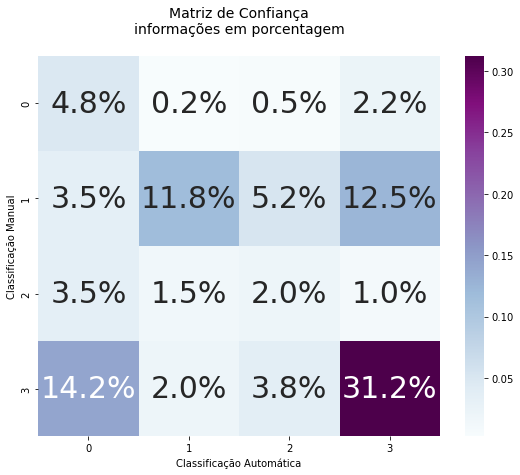

In [11]:
plt.figure(figsize = (9,7))
plt.title('Matriz de Confiança\ninformações em porcentagem\n',fontdict={'fontsize': 14})
sn.heatmap(performance_table, annot=True, annot_kws={"size":30},fmt='.1%',cmap="BuPu")
plt.xlabel('Classificação Automática')
plt.ylabel('Classificação Manual')

In [12]:
true_positives = performance_table[0][0]+performance_table[1][1]+performance_table[2][2]+performance_table[3][3]
print(f'Verdaveiros Positivos: {round(true_positives, 4)*100}%')
print(f'Falsos Positivos: {round(1 - true_positives, 4)*100}%')

Verdaveiros Positivos: 49.75%
Falsos Positivos: 50.24999999999999%


___
### Verificando a performance do Classificador

Agora você deve testar o seu classificador com a base de Testes.

___
### Concluindo

___
### Qualidade do Classificador a partir de novas separações das notícias entre Treinamento e Teste

Caso for fazer esse item do Projeto

___
## Aperfeiçoamento:

Trabalhos que conseguirem pelo menos conceito B vão evoluir em conceito dependendo da quantidade de itens avançados:

* IMPLEMENTOU outras limpezas e transformações que não afetem a qualidade da informação contida nas notícias. Ex: stemming, lemmatization, stopwords
* CONSIDEROU mais de duas caterogias na variável Target e INCREMENTOU a quantidade de notícias, mantendo pelo menos 250 notícias por caterogia (OBRIGATÓRIO PARA TRIOS, sem contar como item avançado)
* Para Target com duas categorias: CRIOU pelo menos quatro categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante
* EXPLICOU porquê não pode usar o próprio classificador para gerar mais amostras de treinamento
* PROPÔS diferentes cenários para Naïve Bayes fora do contexto do projeto (pelo menos dois cenários, exceto aqueles já apresentados em sala pelos professores: por exemplo, filtro de spam)
* SUGERIU e EXPLICOU melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* FEZ o item Qualidade do Classificador a partir de novas separações das Notícias entre Treinamento e Teste descrito no enunciado do projeto (OBRIGATÓRIO para conceitos A ou A+)

___
## Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**